<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/Do_it!_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%8C%90%EB%8B%A4%EC%8A%A4_%EC%9E%85%EB%AC%B8_pg_241~_271_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Do it! 데이터 분석을 위한 판다스 입문 pg. 241~ 271 필사

## 1. datatime 오브젝트

-datatime 라이브러리: 날짜, 시간 처리 -> data 오브젝트, time 오브젝트, datetime 오브젝트

1) datetime 오브젝트 사용

In [2]:
from datetime import datetime

now, today 메서드 사용해 현재 시간 출력

In [4]:
now1 = datetime.now()
print(now1)
now2=datetime.today()
print(now2)

2023-09-27 04:41:08.555208
2023-09-27 04:41:08.556026


datetime 오브젝트 생성시 시간 직접 입력해 인자로 전달

In [5]:
t1=datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2023-09-27 04:42:14.539895
1970-01-01 00:00:00
1970-12-12 13:24:34


In [6]:
diff1=t1-t2

print(diff1)
print(type(diff1))

diff2=t2-t1

print(diff2)
print(type(diff2))

19627 days, 4:42:14.539895
<class 'datetime.timedelta'>
-19628 days, 19:17:45.460105
<class 'datetime.timedelta'>


datetime 오브젝트로 변환: to_datetime 메서드: 시계열->문자열 저장

In [12]:
import pandas as pd
import os

ebola=pd.read_csv('/content/country_timeseries.csv')

print(ebola.info())

#to_datetime 메서드 사용해 date열의 자료형을 datetime오브젝트로 변환 후 새로운 열로 추가
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [16]:
#시간형식지정자와 기호 조합해 format 인자에 전달하여 형식에 맞게 정리된 datetime 오브젝트

test_df1=pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

test_df2=pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15
  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


시간 형식 지정자 : %a 요일, %d 날짜 2자리로, %b 월, $s 초 등

시계열 데이터 구분해서 추출

In [17]:
now=datetime.now()
print(now)

nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

nowTime=now.strftime('%H:%M:%S')
print(nowTime)

nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2023-09-27 04:59:43.591891
2023-09-27
04:59:43
2023-09-27 04:59:43


datetime 오브젝트로 변환하려는 열 지정해 데이터 집합 불러오기

In [18]:
ebola1=pd.read_csv('/content/country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

datetime 오브젝트에서 날짜 정보 추출

In [20]:
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]
2018
5
16


dt 접근자로 시계열 데이터 정리

In [21]:
ebola=pd.read_csv('/content/country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

dt 접근자 사용하지 않고 인덱스 3인 데이터 년월일 추출

In [23]:
print(ebola[['Date','date_dt']].head())
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


date_dt 열의 특정 데이터를 인덱스로 접근해야해서 불편-> date_dt 열에 한 번에 접근 후 year 속성 이용해 연도값 추출

In [24]:
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


월, 일 데이터도 한번에 추출해 새로운 열로 추가

In [25]:
ebola['month'], ebola['day']=(ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 자료형 출력

In [26]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

2. 사례별 시계열 데이터 계산하기

에볼라 최초 발병일 계산하기

In [27]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [28]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


date열에서 최초 발병일 빼면 에볼라 진행정도 볼 수 있음

In [29]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


파산한 은행 개수 계산

In [37]:
banks=pd.read_csv('/content/banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


closing date, updated date 열의 데이터 자료형은 문자열이니 parse_dates 속성 이용해 datetime 오브젝트로 변환해 불러오기

In [34]:
banks_no_dates=pd.read_csv('/content/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB
None


In [40]:
banks = pd.read_csv('/content//banklist.csv', parse_dates=[5, 6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [41]:
banks['closing_quarter'], banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  \
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
2  58302                         Whitney Bank   2017-04-28   2017-07-26   
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18   
4  19328                  State Bank of Texas   2017-01-27   2017-05-18   

   closing_quarter  closing_year  
0                2          2017 

In [42]:
#groupby 사용해 연도별 파산 은행 개수


closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [43]:
# 각 연도별, 분기별 파산 은행 개수
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

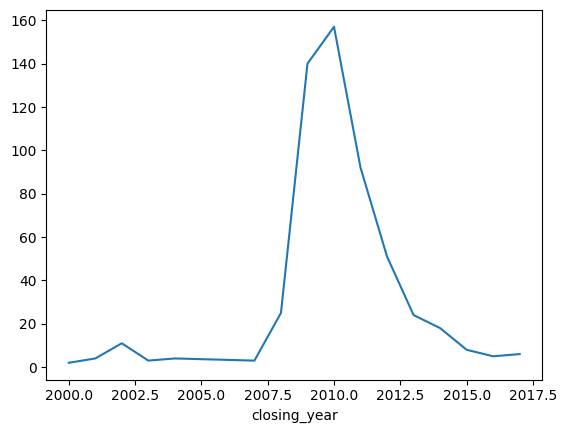

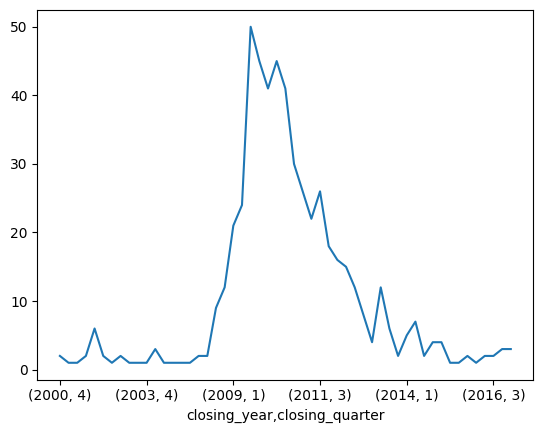

In [44]:
#그래프로

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot()

plt.show()

fig, ax = plt. subplots()
ax = closing_year_q.plot()
plt.show()

테슬라 주식 데이터로 시간 계산하기

In [45]:
pip install pandas-datareader

In [50]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

#tesla = pdr.get_data_quandl('TSLA', api_key = '받은 key') : tesla에 데이터프레임 저장

#tesla에 저장된 데이터프레임 파일로 저장

tesla = pd.read_csv('/content/TSLA.csv')
print(tesla.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [51]:

tesla = pd.read_csv('/content/TSLA.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB
None


In [52]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100


datetime 오브젝트와 인덱스 - DatetimeIndex

In [53]:
#datetime 오브젝트를 인덱스로 설정해 데이터 추출
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)


In [54]:
#datetime 오브젝트를 인덱스로 지정한후 원하는 시간 데이터 바로 추출 가능
print(tesla['2015'].iloc[:5, :5])

print(tesla['2010-06'].iloc[:, :5])

                 Date        Open        High         Low       Close
Date                                                                 
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995
                 Date       Open   High        Low      Close
Date                                                         
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000


<ipython-input-54-2501590184ba>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2015'].iloc[:5, :5])
<ipython-input-54-2501590184ba>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2010-06'].iloc[:, :5])


시간 간격과 인덱스 - TimedeltaIndex
: 시간 간격을 인덱스로 지정해 데이터 추출

In [55]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())


                 Date       Open   High        Low      Close  Adj Close  \
Date                                                                       
2010-06-29 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
2010-06-30 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   
2010-07-01 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   
2010-07-02 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   
2010-07-06 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   

              Volume ref_date  
Date                           
2010-06-29  18766300   0 days  
2010-06-30  17187100   1 days  
2010-07-01   8218800   2 days  
2010-07-02   5139800   3 days  
2010-07-06   6866900   7 days  


In [56]:
tesla.index = tesla['ref_date'] # 시간 간격
print(tesla.iloc[:5, :5])

print(tesla['5 days':].iloc[:5, :5]) #데이터 수집 이후 최초 5일 데이터 추출

               Date       Open   High        Low      Close
ref_date                                                   
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001
7 days   2010-07-06  20.000000  20.00  15.830000  16.110001
               Date       Open       High        Low      Close
ref_date                                                       
7 days   2010-07-06  20.000000  20.000000  15.830000  16.110001
8 days   2010-07-07  16.400000  16.629999  14.980000  15.800000
9 days   2010-07-08  16.139999  17.520000  15.570000  17.459999
10 days  2010-07-09  17.580000  17.900000  16.549999  17.400000
13 days  2010-07-12  17.950001  18.070000  17.000000  17.049999


시간 범위와 인덱스 : 시간 범위 생성해 인덱스로 지정

In [57]:
ebola=pd.read_csv('/content/country_timeseries.csv',parse_dates=[0])
print(ebola.iloc[:5,:5]) #2015 01 01 데이터 누락

print(ebola.iloc[-5:,:5]) #2014 03 23 데이터 누락

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [58]:
#date_range 메서드 사용해 사이 시간 인덱스 생성
head_range=pd.date_range(start='2014-12-31',end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [59]:
#원본 데이터 손상 방지 위해 ebola 앞쪽 5개 추출해 새 데이터프레임 만들기
ebola_5=ebola.head()
ebola_5.index=ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


시간 범위 주기 설정: freq 속성값으로 사용가능한 시간 주기

-> B 평일만 포함, C 사용자 정의 평일만 포함, D 달력 일자 단위, W 주간 단위 등

In [60]:
print(pd.date_range('2017-01-01','2017-01-07',freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


시간 범위 수정하고 데이터 밀어내기 -Shift 메서드

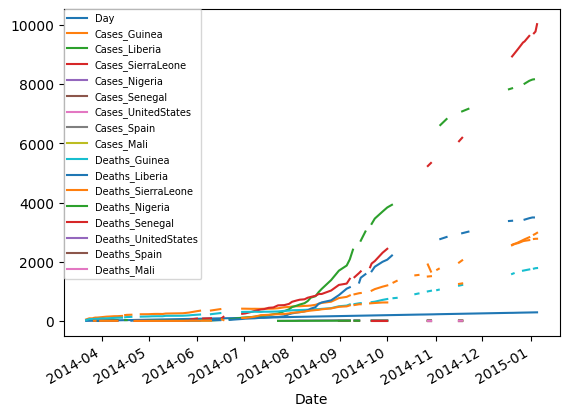

In [62]:
import matplotlib.pyplot as plt

ebola.index=ebola['Date']

fig, ax=plt.subplots()
ax=ebola.iloc[0:,1:].plot(ax=ax)

ax.legend(fontsize=7,loc=2,borderaxespad=0.)
plt.show()
#ebola date열 인덱스로 지정후 x축 date, y축 사망자수

In [63]:
#각 나라별 에볼라 발병일 달라서 그래프 그려지기 시작 지점 다름-> 동일하게 하기
ebola_sub=ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [65]:
#그래프 그리기 위한 데이터프레임 준비
ebola=pd.read_csv('/content/country_timeseries.csv',parse_dates=['Date'])

print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [66]:
#date열 인덱스 지정후 ebola의 date열 최대, 최소값으로 시간 범위 생성해 new_idx 저장
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(),ebola.index.max())

In [67]:
print(new_idx) #시간 순서 반대

new_idx=reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [69]:
#reindex 사용해 새로 생성한 인덱스 새로운 인덱스로 지정
ebola=ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [71]:
#각 나라의 에볼라 발병일 옮기기
last_valid=ebola.apply(pd.Series.last_valid_index)
print(last_valid)

first_valid=ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [72]:
#각 나라의 에볼라 발병일 동일한 출발선으로 옮기려면 처음 발병 날에서 각 나라 에볼라 발병일 뺸만큼 옮김
earliest_date=ebola.index.min()
print(earliest_date)

shift_values=last_valid-earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [74]:
ebola_dict={}
for idx,col in enumerate(ebola):
  d=shift_values[idx].days
  shifted=ebola[col].shift(d)
  ebola_dict[col]=shifted

In [75]:
ebola_shift=pd.DataFrame(ebola_dict)

In [77]:
print(ebola_shift.tail()) #이제 다 최처 발병일 기준으로 모든 열 데이터 옮겨짐

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [78]:
#인덱스 day열로 지정하고 그래프에 필요없는 date, day 삭제
ebola_shift.index=ebola_shift['Date']
ebola_shift=ebola_shift.drop(['Date','Day'],axis=1)

print(ebola_shift.tail())

            Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Date                                                                        
2014-03-26          86.0            8.0                2.0            1.0   
2014-03-25          86.0            NaN                NaN            NaN   
2014-03-24          86.0            7.0                NaN            NaN   
NaT                  NaN            3.0                2.0            NaN   
2014-03-22          49.0            8.0                6.0            0.0   

            Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Date                                                                     
2014-03-26            NaN                 1.0          1.0         NaN   
2014-03-25            NaN                 NaN          NaN         NaN   
2014-03-24            NaN                 NaN          NaN         NaN   
NaT                   NaN                 NaN          NaN         NaN   
2014-03-22      

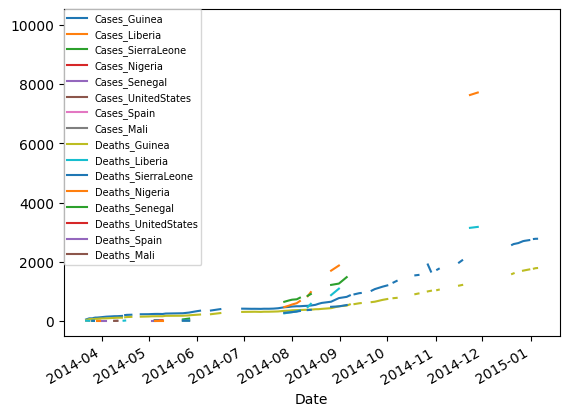

In [79]:
fig,ax=plt.subplots()
ax=ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7,loc=2,borderaxespad=0.)
plt.show()